In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

In [ ]:
import clip
model, preprocess = clip.load('ViT-B/32')

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 136MiB/s]


In [ ]:
! wget http://images.cocodataset.org/zips/val2014.zip
! wget https://raw.githubusercontent.com/tylin/coco-caption/master/annotations/captions_val2014.json
! unzip -q val2014.zip

In [ ]:
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader

In [ ]:
import torch
from torchvision.transforms import Resize, CenterCrop, Compose, InterpolationMode
dataset = CocoDetection(root='/content/val2014',
                    annFile='captions_val2014.json',
                    transform= Compose([
                        Resize(size=50, interpolation=InterpolationMode.BICUBIC, max_size=None, antialias=None),
                        CenterCrop((50, 50))              
                    ])
)

print('COCO dataset:\n', dataset)
dataloader = DataLoader(dataset, batch_size=10, 
                        pin_memory=torch.cuda.is_available(), num_workers=2, shuffle=False)




loading annotations into memory...
Done (t=0.30s)
creating index...
index created!
COCO dataset:
 Dataset CocoDetection
    Number of datapoints: 40504
    Root location: /content/val2014
    StandardTransform
Transform: Compose(
               Resize(size=50, interpolation=bicubic, max_size=None, antialias=None)
               CenterCrop(size=(50, 50))
           )


In [ ]:
len(dataset), image_embeddings.shape

(40504, (40504, 512))

In [ ]:
clip_filename = 'CLIP_ViT-B-32'

image_embeddings = torch.load(f'/content/drive/MyDrive/embeddings/coco_val2014/image/{clip_filename}.pt', map_location='cpu')
text_embeddings = torch.load(f'/content/drive/MyDrive/embeddings/coco_val2014/text/{clip_filename}_0.pt', map_location='cpu')

image_embeddings = image_embeddings.numpy()
text_embeddings = text_embeddings.numpy()

In [ ]:
!pip install tsnecuda==3.0.1+cu111 -f https://tsnecuda.isx.ai/tsnecuda_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://tsnecuda.isx.ai/tsnecuda_stable.html
     |████████████████████████████████| 80.4 MB 38 kB/s 


In [ ]:
from tsnecuda import TSNE
import matplotlib.pyplot as plt

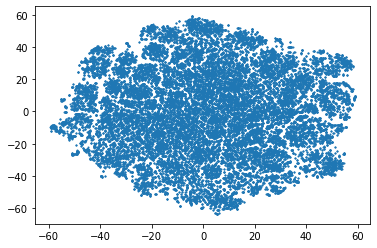

In [ ]:
embeddings_projected = TSNE(perplexity=5).fit_transform(image_embeddings)
plt.scatter(embeddings_projected[:, 0], embeddings_projected[:, 1], s=1)

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
from math import floor
import PIL
from PIL import Image
from torchvision.transforms import ToTensor


embeddings_projected -= embeddings_projected.min(axis=0)
embeddings_projected /= (embeddings_projected.max(axis=0) + 1e-3)

S = 3000 # size of full embedding image
img_size = 50 
num_imgs = S // img_size
G = np.zeros((num_imgs, num_imgs)) - 1

full_image = np.zeros((S, S, 3))

n_iter = 50_000
for i in tqdm(range(min(n_iter, len(dataset)))):
    a = floor(embeddings_projected[i, 0] * num_imgs)
    b = floor(embeddings_projected[i, 1] * num_imgs)

    if G[a, b] == -1:
        G[a, b] = i

        img = np.array(dataset[i][0])
        full_image[a*img_size:(a+1)*img_size, b*img_size:(b+1)*img_size] = img

Image.fromarray(np.uint8(full_image), 'RGB').save('best_image_of_the_world_5.png')



  0%|          | 0/40504 [00:00<?, ?it/s]

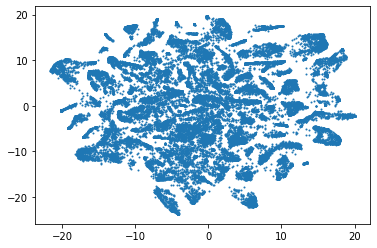

In [ ]:
embeddings_projected = TSNE(perplexity=50, learning_rate=20).fit_transform(text_embeddings)
plt.scatter(embeddings_projected[:, 0], embeddings_projected[:, 1], s=1)

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
from math import floor
import PIL
from PIL import Image
from torchvision.transforms import ToTensor


embeddings_projected -= embeddings_projected.min(axis=0)
embeddings_projected /= (embeddings_projected.max(axis=0) + 1e-3)

S = 3000 # size of full embedding image
img_size = 50 
num_imgs = S // img_size
G = np.zeros((num_imgs, num_imgs)) - 1

full_image = np.zeros((S, S, 3))

n_iter = 50_000
for i in tqdm(range(min(n_iter, len(dataset)))):
    a = floor(embeddings_projected[i, 0] * num_imgs)
    b = floor(embeddings_projected[i, 1] * num_imgs)

    if G[a, b] == -1:
        G[a, b] = i

        img = np.array(dataset[i][0])
        full_image[a*img_size:(a+1)*img_size, b*img_size:(b+1)*img_size] = img

Image.fromarray(np.uint8(full_image), 'RGB').save('best_text_of_the_world_50.png')



  0%|          | 0/40504 [00:00<?, ?it/s]